In [24]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import open_clip


In [ ]:
import os
import glob

# Define the path to the results directory
results_dir = '../results/data'

# Use glob to find CSV files with 'cross_modal_nrc_oasis' and 'cross_modal_old' in the name
nrc_oasis_files = glob.glob(os.path.join(results_dir, '*cross_modal_nrc_oasis*.csv'))
old_files = glob.glob(os.path.join(results_dir, '*cross_modal_old*.csv'))

# Initialize empty lists to store individual dataframes
nrc_oasis_dfs = []
old_dfs = []

# Read each CSV file and append it to the appropriate list
for file in nrc_oasis_files:
    df = pd.read_csv(file)
    nrc_oasis_dfs.append(df)

for file in old_files:
    df = pd.read_csv(file)
    old_dfs.append(df)

# Concatenate dataframes in each list
cross_modal_nrc_oasis_df = pd.concat(nrc_oasis_dfs, ignore_index=True)
cross_modal_old_df = pd.concat(old_dfs, ignore_index=True)

# Print the shape of the resulting dataframes
print(f"Loaded NRC-OASIS dataframe shape: {cross_modal_nrc_oasis_df.shape}")
print(f"Loaded OLD dataframe shape: {cross_modal_old_df.shape}")

# Save the concatenated dataframes to new CSV files
cross_modal_nrc_oasis_df.to_csv('../results/data/cross_modal_nrc_oasis_intruments_v1.csv', index=False)
cross_modal_old_df.to_csv('../results/data/cross_modal_old_intruments_v1.csv', index=False)

print("Saved concatenated dataframes to cross_modal_nrc_oasis_vc.csv and cross_modal_old_vc.csv")


# Comparative analysis of NRC-OASIS and OLD

In [ ]:
#data preprocessing steps, latest: combine data with model data, flip sign of effect size for gender/valence rows, remove duplicates, log transform dataset size and params

In [27]:
# Combine model tuple for both dataframes
cross_modal_nrc_oasis_df['model'] = cross_modal_nrc_oasis_df['model'].apply(lambda x: '_'.join(eval(x)))
cross_modal_old_df['model'] = cross_modal_old_df['model'].apply(lambda x: '_'.join(eval(x)))

# Read the model_info_condensed.csv file
model_info_df = pd.read_csv('../data/model_info_condensed.csv')

# Remove "scaling-laws-openclip" from the model column in model_info_df
model_info_df['model'] = model_info_df['model'].str.replace('scaling-laws-openclip', '', regex=False)

# Merge model_info with cross_modal_nrc_oasis_df
cross_modal_nrc_oasis_df = pd.merge(cross_modal_nrc_oasis_df, model_info_df, on='model', how='left')

# Merge model_info with cross_modal_old_df
cross_modal_old_df = pd.merge(cross_modal_old_df, model_info_df, on='model', how='left')

# Print the shapes of the resulting dataframes
print(f"NRC-OASIS dataframe shape after merge: {cross_modal_nrc_oasis_df.shape}")
print(f"OLD dataframe shape after merge: {cross_modal_old_df.shape}")

# Display the first few rows of each dataframe to verify the merge
print("\nFirst few rows of NRC-OASIS dataframe:")
print(cross_modal_nrc_oasis_df.head())
print("\nFirst few rows of OLD dataframe:")
print(cross_modal_old_df.head())


In [ ]:
# Flip the sign of effect size for Gender/Valence rows
cross_modal_nrc_oasis_df.loc[cross_modal_nrc_oasis_df['Image Test'] == 'Gender/Valence', 'effect_size'] *= -1
cross_modal_old_df.loc[cross_modal_old_df['Image Test'] == 'Gender/Valence', 'effect_size'] *= -1



In [67]:
# Check for cases where na in pretraining_dataset
cross_modal_nrc_oasis_df = cross_modal_nrc_oasis_df.dropna(subset=['pretraining_dataset'])
print(len(cross_modal_nrc_oasis_df))
cross_modal_old_df = cross_modal_old_df.dropna(subset=['pretraining_dataset'])
print(len(cross_modal_old_df))

4192
4192


In [68]:
# Find and remove duplicates in cross_modal_nrc_oasis_df
# Find and remove duplicates based on all columns after 'order'
columns_to_check = cross_modal_nrc_oasis_df.columns[cross_modal_nrc_oasis_df.columns.get_loc('order') + 1:]
duplicate_rows = cross_modal_nrc_oasis_df.duplicated(subset=columns_to_check)
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Remove duplicates
cross_modal_nrc_oasis_df = cross_modal_nrc_oasis_df.drop_duplicates(subset=columns_to_check)

# Print the number of remaining elements
print(f"Number of remaining elements after removing duplicates: {len(cross_modal_nrc_oasis_df)}")

# Find and remove duplicates in cross_modal_nrc_oasis_df
# Find and remove duplicates based on all columns after 'order'
columns_to_check = cross_modal_old_df.columns[cross_modal_old_df.columns.get_loc('order') + 1:]
duplicate_rows = cross_modal_old_df.duplicated(subset=columns_to_check)
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Remove duplicates
cross_modal_old_df = cross_modal_old_df.drop_duplicates(subset=columns_to_check)

# Print the number of remaining elements
print(f"Number of remaining elements after removing duplicates: {len(cross_modal_old_df)}")


Number of duplicate rows: 786
Number of remaining elements after removing duplicates: 3406
Number of duplicate rows: 786
Number of remaining elements after removing duplicates: 3406


In [ ]:
cross_modal_nrc_oasis_df['log_dataset_size'] = np.log(cross_modal_nrc_oasis_df['pretraining_dataset_size'])
cross_modal_nrc_oasis_df['log_params'] = np.log(cross_modal_nrc_oasis_df['params'])

cross_modal_old_df['log_dataset_size'] = np.log(cross_modal_old_df['pretraining_dataset_size'])
cross_modal_old_df['log_params'] = np.log(cross_modal_old_df['params'])

In [72]:
#data preprocessing done
cross_modal_nrc_oasis_df.to_csv('../results/data_NAACL/cross_modal_nrc_oasis_df_final_to_model_v1.csv')
cross_modal_old_df.to_csv('../results/data_NAACL/cross_modal_old_df_final_to_model_v1.csv')

In [83]:
cross_modal_nrc_oasis_df = pd.read_csv('../results/data_NAACL/cross_modal_nrc_oasis_df_final_to_model_v1.csv')
cross_modal_old_df = pd.read_csv('../results/data_NAACL/cross_modal_old_df_final_to_model_v1.csv')

In [87]:
# Group by Image Test and calculate mean and std dev for effect sizes
effect_size_stats = cross_modal_nrc_oasis_df.groupby('Image Test')['effect_size'].agg(['mean', 'std'])

print("Effect sizes by Image Test (mean ± std):")
for test in effect_size_stats.index:
    mean = effect_size_stats.loc[test, 'mean']
    std = effect_size_stats.loc[test, 'std']
    print(f"{test}: {mean:.3f} ± {std:.3f}")


Effect sizes by Image Test (mean ± std):
Age/Valence: 0.007 ± 0.743
Gender/Valence: 0.361 ± 0.463
Insect-Flower/Valence: 1.490 ± 0.390
Instrument-Weapon/Valence: 1.341 ± 0.446
Race/Valence: 0.248 ± 0.552


In [77]:
# Calculate percentage of effect sizes > 0.2 for each dataset
nrc_oasis_pct = (cross_modal_nrc_oasis_df['effect_size'] > 0.2).mean() * 100
old_pct = (cross_modal_old_df['effect_size'] > 0.2).mean() * 100

print("Percentage of effect sizes > 0.2:")
print(f"NRC-OASIS dataset: {nrc_oasis_pct:.2f}%")
print(f"SEAT/IEAT dataset: {old_pct:.2f}%")


Percentage of effect sizes > 0.2:
NRC-OASIS dataset: 70.23%
SEAT/IEAT dataset: 67.88%


In [82]:
# Calculate percentage of effect sizes > 0.2 for each dataset
nrc_oasis_pct = (cross_modal_nrc_oasis_df['effect_size'] > 0).mean() * 100
old_pct = (cross_modal_old_df['effect_size'] > 0).mean() * 100

print("Percentage of effect sizes > 0:")
print(f"NRC-OASIS dataset: {nrc_oasis_pct:.2f}%")
print(f"SEAT/IEAT dataset: {old_pct:.2f}%")

Percentage of effect sizes > 0:
NRC-OASIS dataset: 78.86%
SEAT/IEAT dataset: 77.07%


In [73]:
# Count unique models in cross_modal_nrc_oasis_instruments
unique_models = cross_modal_nrc_oasis_df['model'].nunique()
print(f"Number of unique models: {unique_models}")


Number of unique models: 131


In [74]:
# List number of unique datasets, architectures, and range of params

# Unique datasets
unique_datasets = cross_modal_nrc_oasis_df['pretraining_dataset'].nunique()
print(f"Number of unique datasets: {unique_datasets}")

# Unique architectures
unique_architectures = cross_modal_nrc_oasis_df['architecture'].nunique()
print(f"Number of unique architectures: {unique_architectures}")

# Range of params
min_params = cross_modal_nrc_oasis_df['params'].min()
max_params = cross_modal_nrc_oasis_df['params'].max()
print(f"Range of params: {min_params:,.0f} to {max_params:,.0f}")

# Optional: List unique datasets and architectures
print("\nUnique datasets:")
print(cross_modal_nrc_oasis_df['pretraining_dataset'].unique())

print("\nUnique architectures:")
print(cross_modal_nrc_oasis_df['architecture'].unique())


Number of unique datasets: 26
Number of unique architectures: 55
Range of params: 102,010,000 to 5,044,890,000

Unique datasets:
['laion80m' 'laion400m' 'laion2b' 'metaclip_400m' 'metaclip_fullcc'
 'openai_wit' 'datacomp1b' 'datacomp_l' 'webli' 'webli_multilingual'
 'datacomp_m' 'commonpool_m' 'datacomp_s' 'commonpool_s' 'laion_aesthetic'
 'mscoco_finetuned_laion2b' 'commonpool_xl_clip_filtered'
 'commonpool_xl_laion_filtered' 'laion5b' 'commonpool_xl' 'dfn2b' 'dfn5b'
 'yfcc15m' 'cc12m' 'commonpool_l' 'merged2b']

Unique architectures:
['ViT-L-14' 'ViT-B-32' 'ViT-B-16' 'ViT-H-14' 'ViT-g-14'
 'ViT-B-32-quickgelu' 'RN50x4' 'RN50x16' 'RN50x64' 'ViT-B-16-SigLIP-256'
 'ViT-B-16-SigLIP-i18n-256' 'ViT-B-16-SigLIP-384' 'ViT-B-16-SigLIP-512'
 'ViT-L-16-SigLIP-256' 'ViT-L-16-SigLIP-384' 'ViT-SO400M-14-SigLIP'
 'ViT-SO400M-14-SigLIP-384' 'ViT-L-14-CLIPA' 'nllb-clip-large-siglip'
 'ViT-L-14-CLIPA-336' 'ViT-H-14-CLIPA' 'ViT-H-14-CLIPA-336'
 'ViT-bigG-14-CLIPA' 'ViT-bigG-14-CLIPA-336' 'nllb-clip-bas

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to create and save the plot
def plot_aggregate_effect_size(df, title, filename):
    # Ensure we have the necessary columns
    required_columns = ['Image Test', 'order', 'effect_size']
    if not all(col in df.columns for col in required_columns):
        raise ValueError("Required columns are missing from the dataframe")

    # Calculate the mean effect size for each test category (Image Test) and order
    aggregated_data = df.groupby(['Image Test', 'order'])['effect_size'].mean().reset_index()

    # Define the desired order of test categories
    category_order = ['Insect-Flower/Valence', 'Race/Valence', 'Gender/Valence', 'Age/Valence']

    # Create the plot with increased font size
    plt.figure(figsize=(14, 8))
    sns.set(font_scale=1.4, style="whitegrid")  # Increase font size and set style to whitegrid
    sns.barplot(x='Image Test', y='effect_size', hue='order', data=aggregated_data, order=category_order)

    plt.title(title, fontsize=18)
    plt.xlabel('Test Category', fontsize=18)
    plt.ylabel('Mean Effect Size', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(title='Modality Order', fontsize=16, title_fontsize=16)
    plt.tight_layout()
    
    # Save the plot as PDF
    plt.savefig(f'../results/plots/{filename}.pdf', facecolor='white', edgecolor='none')
    plt.close()

    # Print the raw numbers
    print("Raw numbers used to create the plot:")
    print(aggregated_data.to_string(index=False))

# Plot for cross_modal_nrc_oasis_df
plot_aggregate_effect_size(cross_modal_nrc_oasis_df, 'Aggregate Effect Size by Test Category Across Modality Orders (NRC-OASIS)', 'nrc_oasis_aggregate_effect_size_v1')

# Function to create and save the plot for modality order
def plot_modality_order_effect_size(df, title, filename):
    # Aggregate data only on modality order
    order_aggregated_data = df.groupby('order')['effect_size'].mean().reset_index()

    # Create the plot with increased font size
    plt.figure(figsize=(12, 8))
    sns.set(font_scale=1.4, style="whitegrid")  # Increase font size and set style to whitegrid
    sns.barplot(x='order', y='effect_size', data=order_aggregated_data)

    plt.title(title, fontsize=18)
    plt.xlabel('Modality Order', fontsize=18)
    plt.ylabel('Mean Effect Size', fontsize=18)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    
    # Save the plot as PDF
    plt.savefig(f'../results/plots/{filename}.pdf', facecolor='white', edgecolor='none')
    plt.close()

    # Print the raw numbers
    print("Raw numbers used to create the plot:")
    print(order_aggregated_data.to_string(index=False))

# Plot for cross_modal_nrc_oasis_df
plot_modality_order_effect_size(cross_modal_nrc_oasis_df, 'Aggregate Effect Size by Modality Order (NRC-OASIS)', 'nrc_oasis_modality_order_effect_size')


Raw numbers used to create the plot:
           Image Test           order  effect_size
          Age/Valence       all image    -0.368034
          Age/Valence        all text     0.565038
          Age/Valence image as target    -0.466720
          Age/Valence  text as target     0.296866
       Gender/Valence       all image     0.505793
       Gender/Valence        all text     0.089977
       Gender/Valence image as target     0.307021
       Gender/Valence  text as target     0.585387
Insect-Flower/Valence       all image     1.760749
Insect-Flower/Valence        all text     1.261047
Insect-Flower/Valence image as target     1.750580
Insect-Flower/Valence  text as target     1.185688
         Race/Valence       all image     0.513284
         Race/Valence        all text     0.264615
         Race/Valence image as target    -0.049904
         Race/Valence  text as target     0.242207
Raw numbers used to create the plot:
          order  effect_size
      all image     0.563451
 

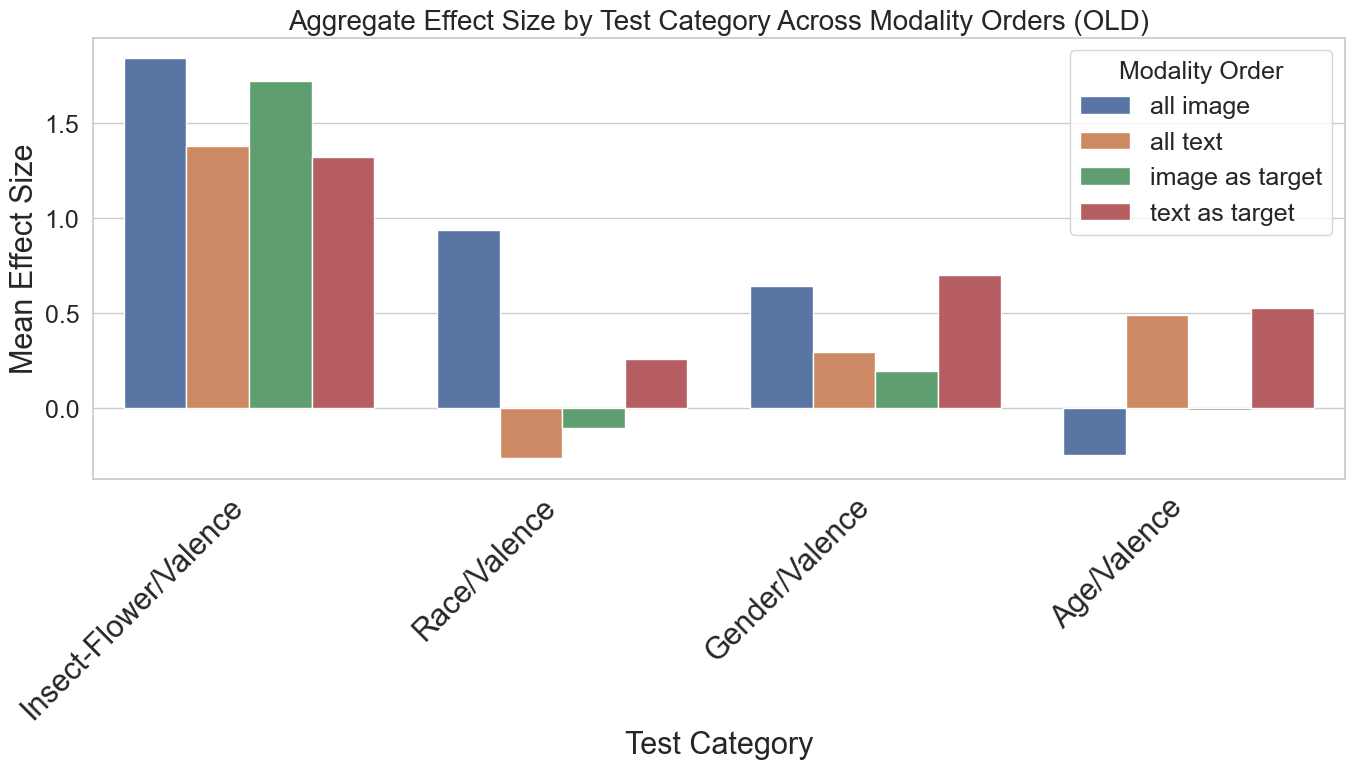

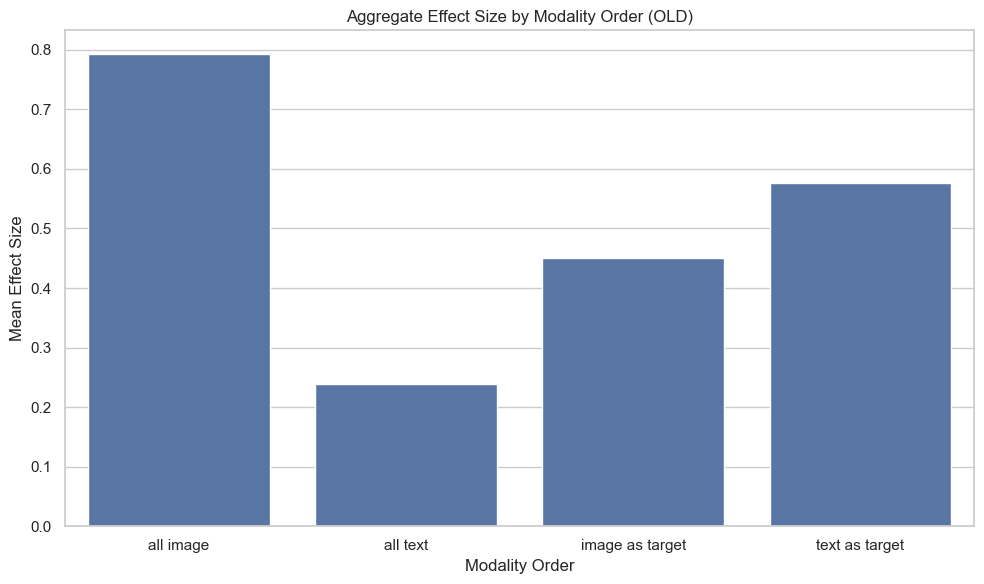

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create and display the plot
def plot_aggregate_effect_size(df, title):
    # Ensure we have the necessary columns
    required_columns = ['Image Test', 'order', 'effect_size']
    if not all(col in df.columns for col in required_columns):
        raise ValueError("Required columns are missing from the dataframe")

    # Define the order of test categories
    test_order = [
        'Insect-Flower/Valence',
        'Race/Valence',
        'Gender/Valence',
        'Age/Valence'
    ]

    # Calculate the mean effect size for each test category (Image Test) and order
    aggregated_data = df.groupby(['Image Test', 'order'])['effect_size'].mean().reset_index()

    # Create the plot with increased font size and white background
    plt.figure(figsize=(14, 8), facecolor='white')
    sns.set(font_scale=1.4, style="whitegrid")  # Increase font size and set style to whitegrid
    sns.barplot(x='Image Test', y='effect_size', hue='order', data=aggregated_data, order=test_order)

    plt.title(title, fontsize=20)
    plt.xlabel('Test Category', fontsize=22)
    plt.ylabel('Mean Effect Size', fontsize=22)
    plt.xticks(rotation=45, ha='right', fontsize=22)
    plt.yticks(fontsize=18)
    plt.legend(title='Modality Order', fontsize=18, title_fontsize=18)
    plt.tight_layout()
    plt.savefig(f'../results/plots/old_aggregate_effect_size.pdf', facecolor='white', edgecolor='none')
    plt.show()

# Plot for cross_modal_nrc_oasis_df
# plot_aggregate_effect_size(cross_modal_nrc_oasis_df, 'Aggregate Effect Size by Test Category Across Modality Orders (NRC-OASIS)')

# Plot for cross_modal_old_df
plot_aggregate_effect_size(cross_modal_old_df, 'Aggregate Effect Size by Test Category Across Modality Orders (OLD)')

# Function to create and display the plot for modality order
def plot_modality_order_effect_size(df, title):
    # Aggregate data only on modality order
    order_aggregated_data = df.groupby('order')['effect_size'].mean().reset_index()

    # Create the plot with white background
    plt.figure(figsize=(10, 6), facecolor='white')
    sns.set(style="whitegrid")  # Set style to whitegrid
    sns.barplot(x='order', y='effect_size', data=order_aggregated_data)

    plt.title(title)
    plt.xlabel('Modality Order')
    plt.ylabel('Mean Effect Size')
    plt.xticks(rotation=0)  # No rotation needed for just two categories
    plt.tight_layout()
    plt.show()

# Plot for cross_modal_old_df
plot_modality_order_effect_size(cross_modal_old_df, 'Aggregate Effect Size by Modality Order (OLD)')

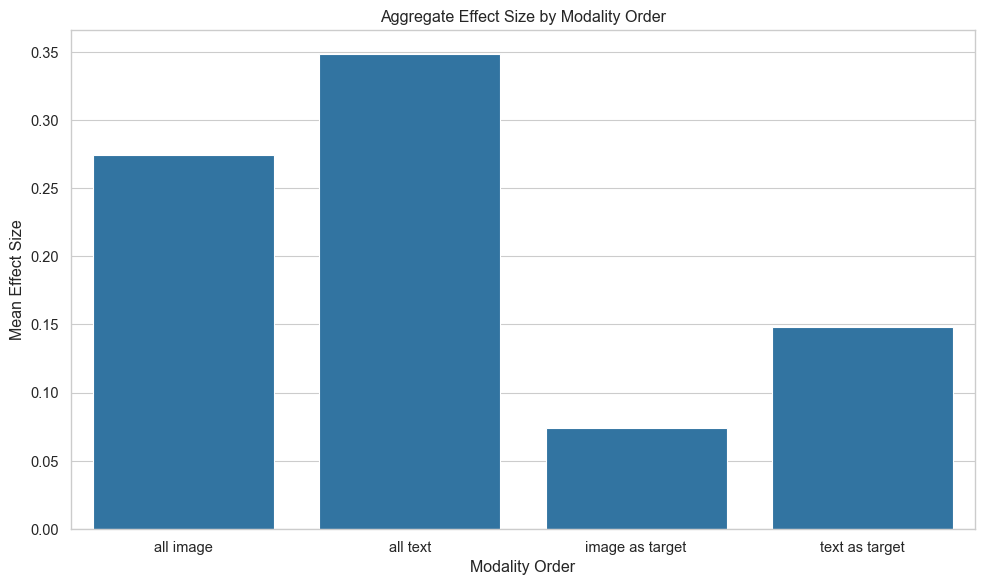

In [26]:
# Aggregate data only on modality order
order_aggregated_data = cross_modal_nrc_oasis_df.groupby('order')['effect_size'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='order', y='effect_size', data=order_aggregated_data)

plt.title('Aggregate Effect Size by Modality Order')
plt.xlabel('Modality Order')
plt.ylabel('Mean Effect Size')
plt.xticks(rotation=0)  # No rotation needed for just two categories
plt.tight_layout()
plt.show()
